# Examples of overlayed datasets
Last Update : 4th October 2019

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

To the code in this notbook, we need to install `keras`, `tensorflow_datasets`, `scikit-image` to get the datasets.

In [ ]:
!pip install keras tensorflow_datasets scikit-image

In [3]:
import tensorflow_datasets as tfds
from keras.datasets import mnist, cifar10
from helpers import plot_grid
from overlay import overlay_img, overlay_save_datasets
import numpy as np

## CIFAR10 + MNIST

In [4]:
# download datasets
(cf_x_train, cf_y_train), (cf_x_test, cf_y_test) = cifar10.load_data()
(mn_x_train, mn_y_train), (mn_x_test, mn_y_test) = mnist.load_data()

In [5]:
# create new overlayed daatsets
cf_mn, mn_selected = overlay_img(cf_x_test, 
                                 mn_x_test, 
                                 seed=123, 
                                 is_shift=False)

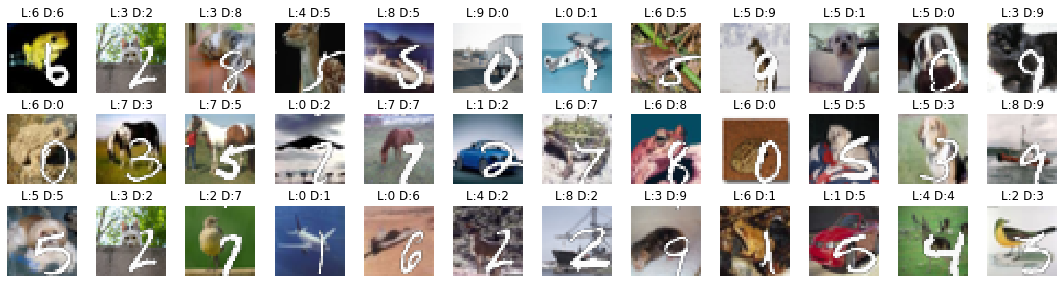

In [6]:
plot_grid(cf_mn, 
          labels=cf_y_test, 
          distractors=mn_y_test[mn_selected], # apply the permutation on the labels
          n_rows=3, n_cols=12, figsize=(15,4), seed=123)

In the above figure, a MNIST image is overlayed above CIFAR10 on the bottom right corner. We can easily shift the digit around:

In [7]:
cf_mn_shft, mn_selected = overlay_img(cf_x_test, 
                                     mn_x_test, 
                                     seed=123, 
                                     is_shift=True)

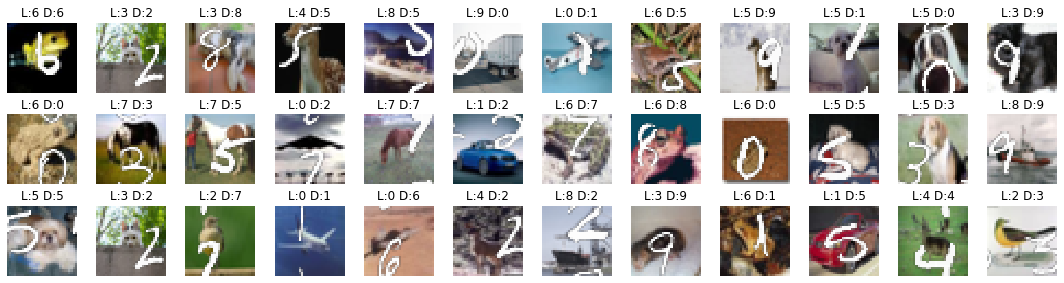

In [8]:
plot_grid(cf_mn_shft, 
          labels=cf_y_test, 
          distractors=mn_y_test[mn_selected], # apply the permutation on the labels
          n_rows=3, n_cols=12, figsize=(15,4), seed=123)

In [ ]:
if False: # True to save the new datasets 
    overlay_save_datasets(cifar10.load_data(), mnist.load_data(), folder="data/cifar10_mnist/")
    train_x = np.load("data/cifar10_mnist/train_x.npy")
    print(len(train_x))
    plot_grid(train_x, 
              labels=np.load("data/cifar10_mnist/train_y.npy"), 
              distractors=np.load("data/cifar10_mnist/train_y_distractor.npy"))

## MNIST + OMNIGLOT

In [10]:
from helpers import _list_of_xy_to_transformed_np

In [11]:
omni = tfds.as_numpy(tfds.load(name="omniglot", as_supervised=True))

# use a smaller omniglot (26x26) to overlay on MNIST
# reverse black and white to be like mnist 
(om_x_train, om_y_train) = _list_of_xy_to_transformed_np(omni['train'],
                                                         transform=lambda x : 255 - x, # reverse b&w 
                                                         shape=(26, 26))
(om_x_test, om_y_test) = _list_of_xy_to_transformed_np(omni['test'],
                                                         transform=lambda x : 255 - x, # reverse b&w 
                                                         shape=(26, 26))

In [12]:
mn_om, om_selected = overlay_img(mn_x_test, 
                                 om_x_test, 
                                 seed=123, 
                                 is_shift=False)

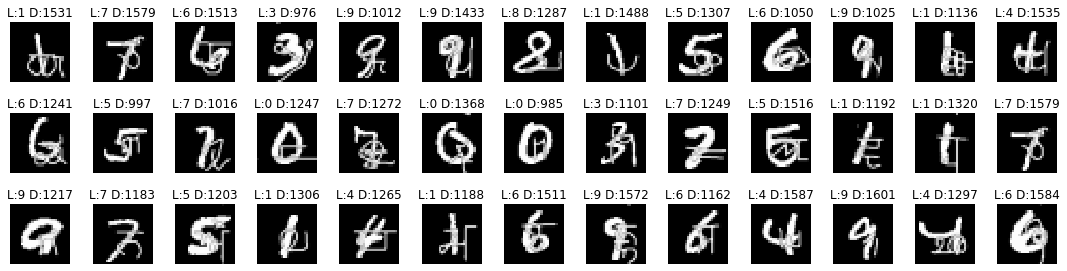

In [13]:
plot_grid(mn_om, 
          labels=mn_y_test, 
          distractors=om_y_test[om_selected], # apply the permutation on the labels
          n_rows=3, n_cols=13, figsize=(15,4), seed=123)

In [ ]:
if False: # True to save the new datasets 
    overlay_save_datasets(mnist.load_data(), 
                          ((om_x_train, om_y_train), (om_x_test, om_y_test)),
                          folder="data/mnist_omniglot/")
    train_x = np.load("data/mnist_omniglot/train_x.npy")
    print(len(train_x))
    plot_grid(train_x, 
              labels=np.load("data/mnist_omniglot/train_y.npy"), 
              distractors=np.load("data/mnist_omniglot/train_y_distractor.npy"))